In [13]:
import unicodedata
import codecs
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

import nltk
from textblob import TextBlob as tb
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.util import ngrams
########################

#Converts text to ascii from unicode.
def load(text):
    #open the text file
    #converting the file from unicode to ascii
    with codecs.open(str(text),
                 "r",encoding='utf-8', errors='replace') as speech:
        raw=speech.read()
        raw_asc = unicodedata.normalize('NFKD', raw).encode('ascii','ignore')
    return raw_asc

def WordCount(word):
    word_count = []
    for i in range(len(speech_list)):
        num = speech_list[i].count(str(word))
        word_count.append(num)
    return word_count

def preprocess(text):
    #open the text file
    #converting the file from unicode to ascii
    with codecs.open(str(text),
                 "r",encoding='utf-8', errors='replace') as speech:
        raw=speech.read()
        raw_asc = unicodedata.normalize('NFKD', raw).encode('ascii','ignore')

    #removing puncutation
    tokenizer = RegexpTokenizer(r'\w+')
    #tokens = sent_tokenize(raw_asc)
    tokens = tokenizer.tokenize(raw_asc)
    #print 'remove punctuation'

    #make everything lowercase
    tokens = [token.lower() for token in tokens]
    all_text = nltk.Text(tokens)
    #print 'All lowercase'

    #removing stopwords and audience responses
    stopset = (stopwords.words('english') + ["[applause]","[laughter]","[boos]"])
    clean = [word for word in all_text if word not in stopset]
    #print 'removed stopwords and audience response'

    return clean

In [14]:
#all speeches are in list. 
speech = []

for i in range(1,59):
    sp = 'InAd/in' + str(i) + '.txt'
    inaug = load(str(sp))
    speech.append(inaug)

print 'Loaded all speeches'

#converts all speeches into tfidf matrix
tfidf = TfidfVectorizer(stop_words='english').fit_transform(speech)

print 'Converted to TF-IDF Matrix.'


#create a cosine similarity matrix for each text file
from sklearn.metrics.pairwise import cosine_similarity
cos = cosine_similarity(tfidf, tfidf)
print cos
print 'Cosine Similarity Matrix Complete'

Loaded all speeches
Converted to TF-IDF Matrix.
[[ 1.          0.0943893   0.19838438 ...,  0.09687884  0.08569288
   0.07547179]
 [ 0.0943893   1.          0.0997907  ...,  0.04543286  0.07682914
   0.07735044]
 [ 0.19838438  0.0997907   1.         ...,  0.14226306  0.14924456
   0.15149875]
 ..., 
 [ 0.09687884  0.04543286  0.14226306 ...,  1.          0.35026895
   0.27937896]
 [ 0.08569288  0.07682914  0.14924456 ...,  0.35026895  1.          0.26252582]
 [ 0.07547179  0.07735044  0.15149875 ...,  0.27937896  0.26252582  1.        ]]
Cosine Similarity Matrix Complete


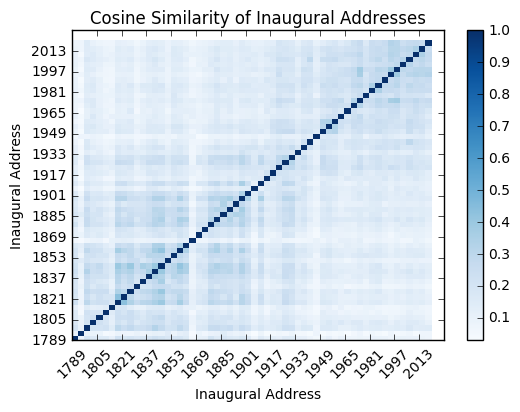

In [23]:


year = range(1789,2017,16)
#show a heat map of how similar speeches are to each other
plt.title('Cosine Similarity of Inaugural Addresses')
plt.xlabel('Inaugural Address')
plt.ylabel('Inaugural Address')
heatmap = plt.pcolor(cos,cmap=plt.cm.Blues)
plt.xticks(range(0,57,4),year,size = '10', rotation = '45')
plt.yticks(range(0,57,4),year,size = '10')
plt.colorbar(heatmap)
plt.show()

In [9]:
#load speeches by word
speech_list = []

for i in range(1,59):
    speech = 'InAd/in' + str(i) + '.txt'
    inaug = preprocess(str(speech))
    speech_list.append(inaug)
    
print 'Addresses loaded'

Addresses loaded


In [10]:
#word length of least common speeches
print len(speech_list[1])
print len(speech_list[19])
print len(speech_list[39])

year = range(1789,2017,4)
numb = range(1,59)
#for i in range(0,57):
   # print year[i]
    #print numb[i]

60
342
254


In [11]:
#Determing the common words and bigrams from speeches between 1814 and 1913

group1 = []
for i in range(0,31):
    for j in range(len(speech_list[i])):
        group1.append(speech_list[i][j])
        
bigrams = ngrams(group1,2)

    
print 'bag of words'
fdist1 = FreqDist(group1)
print fdist1.most_common(15)

print 'bigram'
fdist2 = FreqDist(bigrams)
fdist2.most_common(15)

bag of words
[('government', 419), ('people', 350), ('states', 286), ('upon', 265), ('may', 251), ('shall', 219), ('country', 218), ('great', 209), ('public', 191), ('constitution', 190), ('every', 187), ('citizens', 170), ('power', 168), ('union', 166), ('us', 164)]
bigram


[(('united', 'states'), 126),
 (('fellow', 'citizens'), 91),
 (('general', 'government'), 25),
 (('let', 'us'), 22),
 (('american', 'people'), 22),
 (('federal', 'government'), 19),
 (('constitution', 'united'), 17),
 (('self', 'government'), 16),
 (('every', 'citizen'), 15),
 (('foreign', 'nations'), 14),
 (('upon', 'us'), 13),
 (('four', 'years'), 13),
 (('may', 'well'), 13),
 (('among', 'people'), 13),
 (('within', 'limits'), 12)]

In [12]:
#Determing the common words and bigrams from speeches between 1814 and 1913

group2 = []
for i in range(34,58):
    for j in range(len(speech_list[i])):
        group2.append(speech_list[i][j])
        
bigrams2 = ngrams(group2,2)

    
print 'bag of words'
fdist1 = FreqDist(group2)
print fdist1.most_common(15)

print 'bigram'
fdist2 = FreqDist(bigrams2)
fdist2.most_common(15)

bag of words
[('us', 293), ('world', 244), ('people', 216), ('must', 198), ('america', 188), ('nation', 184), ('new', 176), ('government', 164), ('freedom', 143), ('peace', 135), ('time', 117), ('one', 111), ('great', 107), ('let', 103), ('every', 101)]
bigram


[(('let', 'us'), 76),
 (('united', 'states'), 32),
 (('fellow', 'citizens'), 24),
 (('men', 'women'), 24),
 (('american', 'people'), 17),
 (('god', 'bless'), 16),
 (('federal', 'government'), 15),
 (('vice', 'president'), 15),
 (('self', 'government'), 14),
 (('fellow', 'americans'), 14),
 (('one', 'another'), 13),
 (('chief', 'justice'), 13),
 (('among', 'nations'), 11),
 (('go', 'forward'), 11),
 (('america', 'must'), 11)]

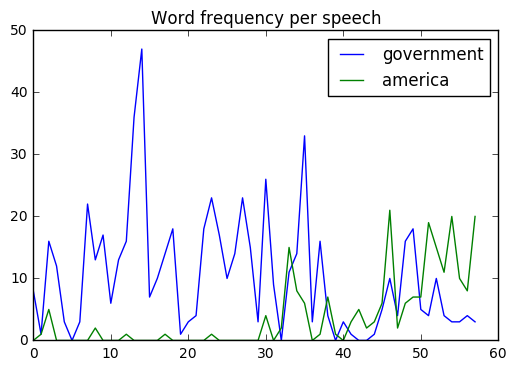

In [13]:
#frequency of words per speech
word = WordCount('government')
word2 = WordCount('america')
plt.title('Word frequency per speech')
plt.plot(word, label = 'government')
plt.plot(word2, label = 'america', color = 'g')
plt.legend(loc = 'upper right')
#plt.axvline(71, color = 'y')
plt.show()


In [14]:
#democratic group: frequenc of words over the last 40 years
d_group = []
d_list = [47,51,52,55,56]

for i in d_list:
    for j in range(len(speech_list[i])):
        d_group.append(speech_list[i][j])
        
d_bigrams = ngrams(d_group,2)

    
print 'bag of words'
fdist1 = FreqDist(d_group)
print fdist1.most_common(10)

print 'bigram'
fdist2 = FreqDist(d_bigrams)
fdist2.most_common(10)

bag of words
[('us', 92), ('new', 64), ('must', 61), ('america', 54), ('world', 51), ('nation', 49), ('people', 46), ('time', 36), ('let', 31), ('today', 30)]
bigram


[(('let', 'us'), 25),
 (('fellow', 'citizens'), 8),
 (('fellow', 'americans'), 8),
 (('america', 'must'), 7),
 (('men', 'women'), 7),
 (('new', 'century'), 6),
 (('new', 'spirit'), 6),
 (('land', 'new'), 6),
 (('health', 'care'), 5),
 (('every', 'american'), 5)]

In [15]:
#republican group: frequency of words over the last 40 years

r_group = []
r_list = [48,49,50,53,54,57]

for i in r_list:
    for j in range(len(speech_list[i])):
        r_group.append(speech_list[i][j])
        
r_bigrams = ngrams(r_group,2)

    
print 'bag of words'
fdist1 = FreqDist(r_group)
print fdist1.most_common(10)

print 'bigram'
fdist2 = FreqDist(r_bigrams)
fdist2.most_common(10)

bag of words
[('us', 81), ('america', 71), ('freedom', 60), ('world', 51), ('people', 50), ('government', 49), ('nation', 48), ('must', 46), ('one', 40), ('new', 38)]
bigram


[(('god', 'bless'), 12),
 (('let', 'us'), 11),
 (('united', 'states'), 9),
 (('men', 'women'), 9),
 (('fellow', 'citizens'), 8),
 (('federal', 'government'), 7),
 (('chief', 'justice'), 6),
 (('vice', 'president'), 6),
 (('president', 'bush'), 5),
 (('first', 'time'), 5)]

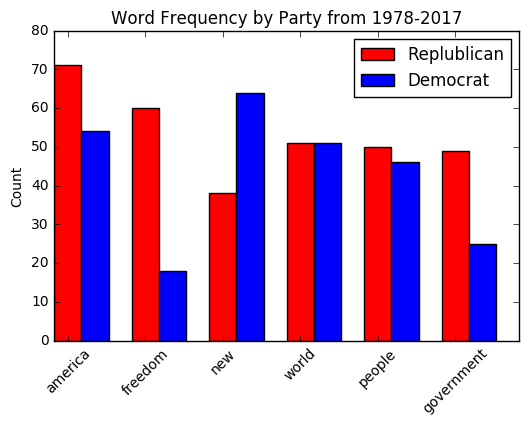

In [16]:
#graph common words referenced by party
N = 6
d_count = (54,18,64,51,46,25)
r_count = (71,60,38,51,50,49)

ind = np.arange(N)  
width = 0.35       

fig, ax = plt.subplots()
r = ax.bar(ind, r_count, width, color='r')

d = ax.bar(ind + width, d_count, width, color='b')

ax.set_ylabel('Count')
ax.set_title('Word Frequency by Party from 1978-2017')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('america','freedom','new','world','people','government'),rotation = 45)

ax.legend((r[0], d[0]), ('Replublican', 'Democrat'))

plt.show()